In [1]:
import cv2
import numpy as np

In [7]:
img_path = '/home/erik/Riksarkivet/Projects/handwritten-text-recognition/data/1930_census/Gotland/cyclegan/cyclegan_datasets/only_overwritten/testA/B0001097_00007_31.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

u, i = np.unique(np.array(img).flatten(), return_inverse=True)
bg = int(u[np.argmax(np.bincount(i))])

wt, ht, _ = (1024, 128, 1)
h, w = np.asarray(img).shape
f = max((w / wt), (h / ht))

new_size = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1))
img = cv2.resize(img, new_size)

target = np.ones([ht, wt], dtype=np.uint8) * bg
target[0:new_size[1], 0:new_size[0]] = img

cv2.imwrite('/home/erik/Riksarkivet/Projects/handwritten-text-recognition/src/notebooks/test.jpg', target)

True

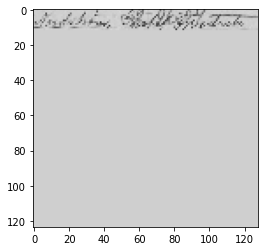

In [5]:
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))